In [287]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

In [2]:
data_1 = pd.read_stata('ps1q1.dta')
data_2 = pd.read_stata('ps1q2.dta')

In [3]:
plt.figure(figsize=(12,10))
import seaborn as sns
corr = data_2.corr()
correlation_matrix = corr.style.background_gradient().set_precision(2)
correlation_matrix
# sns.heatmap(corr, #cmap='gray',
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Year,Tax20,TaxAv,SenDem,SenRep,SenInd,HseDem,HseRep,HseInd
Year,1,-0.073,-0.57,-0.15,0.057,0.6,-0.64,0.64,0.5
Tax20,-0.073,1,0.58,0.46,-0.39,-0.53,-0.00072,-0.0077,-0.2
TaxAv,-0.57,0.58,1,-0.11,0.22,-0.79,0.03,-0.04,-0.15
SenDem,-0.15,0.46,-0.11,1,-0.99,0.34,0.65,-0.65,-0.38
SenRep,0.057,-0.39,0.22,-0.99,1,-0.42,-0.61,0.61,0.36
SenInd,0.6,-0.53,-0.79,0.34,-0.42,1,0.14,-0.12,nan
HseDem,-0.64,-0.00072,0.03,0.65,-0.61,0.14,1,-1,-0.48
HseRep,0.64,-0.0077,-0.04,-0.65,0.61,-0.12,-1,1,0.46
HseInd,0.5,-0.2,-0.15,-0.38,0.36,nan,-0.48,0.46,1


<Figure size 864x720 with 0 Axes>

In [4]:
data_2.describe()

,Year,Tax20,TaxAv,SenDem,SenRep,SenInd,HseDem,HseRep,HseInd
count,33.00000,33.000000,33.000000,33.000000,33.000000,15.000000,33.000000,33.000000,18.000000
mean,1995.00000,31.421209,20.784847,50.393939,49.000000,1.333333,237.242424,197.030303,1.333333
std,9.66954,3.272399,1.453470,4.885817,5.006246,0.487950,27.526158,27.037572,0.485071
min,1979.00000,24.600000,17.299999,44.000000,41.000000,1.000000,193.000000,158.000000,1.000000
25%,1987.00000,29.000000,20.200001,46.000000,45.000000,1.000000,207.000000,176.000000,1.000000
50%,1995.00000,32.000000,21.100000,49.000000,49.000000,1.000000,242.000000,192.000000,1.000000
75%,2003.00000,34.099998,22.000000,55.000000,53.000000,2.000000,258.000000,226.000000,2.000000
max,2011.00000,37.799999,22.700001,58.000000,55.000000,2.000000,277.000000,242.000000,2.000000


In [5]:
data_2.head(3)

,Year,Tax20,TaxAv,SenDem,SenRep,SenInd,HseDem,HseRep,HseInd,President
0,1979,35.099998,22.000000,58,41,1.0,277,158,NaN,Jimmy Carter
1,1980,33.099998,22.000000,58,41,1.0,277,158,NaN,Jimmy Carter
2,1981,30.400000,22.200001,46,53,1.0,242,192,1.0,Ronald Reagan


In [6]:
data_2.tail(3)

,Year,Tax20,TaxAv,SenDem,SenRep,SenInd,HseDem,HseRep,HseInd,President
30,2009,28.9,17.299999,57,41,2.0,257,178,NaN,Barack Obama
31,2010,29.4,18.100000,57,41,2.0,257,178,NaN,Barack Obama
32,2011,29.0,17.600000,51,47,2.0,193,242,NaN,Barack Obama


In [220]:
data_comp = data_2.copy()

In [221]:
# Feature Engineering

data_comp['Tax20_pct'] = data_comp['Tax20'].pct_change()
data_comp['TaxAv_pct'] = data_comp['TaxAv'].pct_change()
data_comp['SenDem_pct'] = data_comp['SenDem'].pct_change()
data_comp['SenRep_pct'] = data_comp['SenRep'].pct_change()
data_comp['tax_diff'] = data_comp['Tax20'] - data_comp['TaxAv']
data_comp['maj_dem'] = data_comp["SenDem"] > data_comp["SenRep"]
data_comp['maj_rep'] = data_comp["SenDem"] < data_comp["SenRep"]

In [200]:
data_comp.head()

,Year,Tax20,TaxAv,SenDem,SenRep,SenInd,HseDem,HseRep,HseInd,President,Tax20_pct,TaxAv_pct,SenDem_pct,SenRep_pct,tax_diff,maj_dem,maj_rep
0,1979,35.099998,22.000000,58,41,1.0,277,158,NaN,Jimmy Carter,NaN,NaN,NaN,NaN,13.099998,True,False
1,1980,33.099998,22.000000,58,41,1.0,277,158,NaN,Jimmy Carter,-0.056980,0.000000,0.000000,0.000000,11.099998,True,False
2,1981,30.400000,22.200001,46,53,1.0,242,192,1.0,Ronald Reagan,-0.081571,0.009091,-0.206897,0.292683,8.199999,False,True
3,1982,26.700001,20.500000,46,53,1.0,242,192,1.0,Ronald Reagan,-0.121710,-0.076577,0.000000,0.000000,6.200001,False,True
4,1983,26.700001,20.200001,46,54,NaN,269,166,NaN,Ronald Reagan,0.000000,-0.014634,0.000000,0.018868,6.500000,False,True


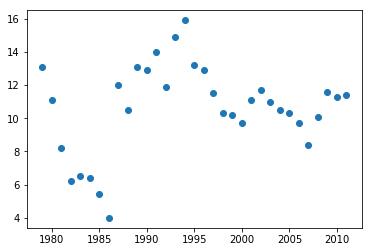

In [137]:
plt.scatter(x = data_comp['Year'], y = data_comp['tax_diff'])

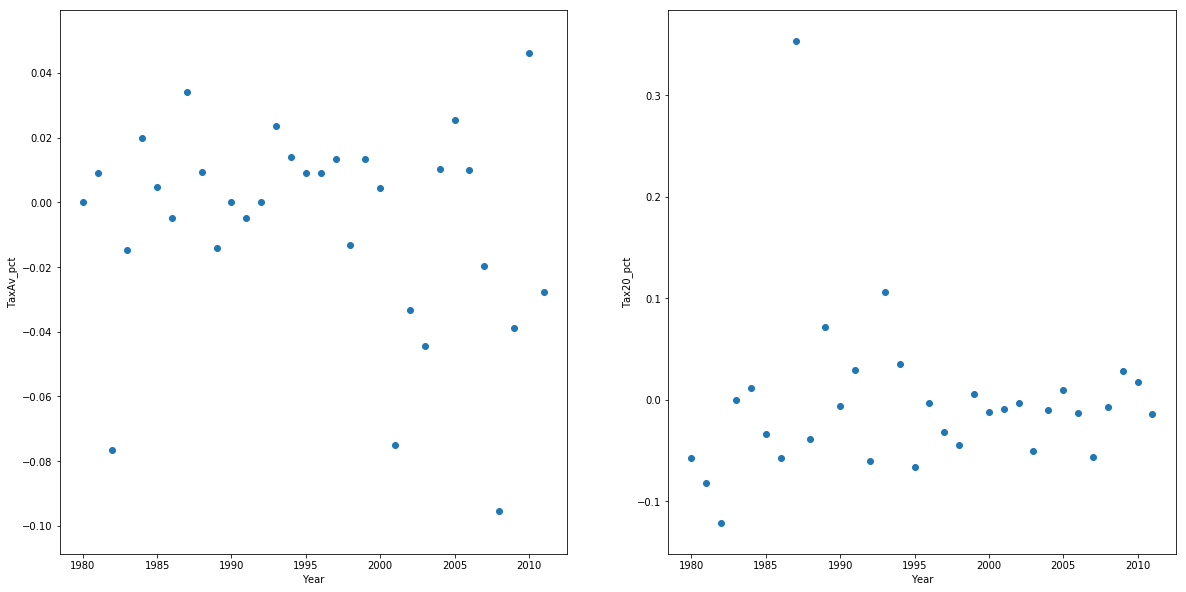

In [359]:
f, ax = plt.subplots(1,2)
f.set_figheight(10)
f.set_figwidth(20)
ax[0].scatter(x = data_comp['Year'], y=data_comp["TaxAv_pct"])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('TaxAv_pct')
ax[1].scatter(x = data_comp['Year'], y=data_comp["Tax20_pct"])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Tax20_pct')
plt.savefig('outlier.png')

In [362]:
data_comp.loc[(data_comp["Tax20_pct"] > 0.3)]

,Year,Tax20,TaxAv,SenDem,SenRep,SenInd,HseDem,HseRep,HseInd,President,Tax20_pct,TaxAv_pct,SenDem_pct,SenRep_pct,tax_diff,maj_dem,maj_rep
8,1987,33.299999,21.299999,55,45,NaN,258,177,NaN,Ronald Reagan,0.353658,0.03398,0.170213,-0.150943,12.0,True,False


In [88]:
data_comp.loc[(data_comp["Tax20_pct"] > 0.3)]

,Year,Tax20,TaxAv,SenDem,SenRep,SenInd,HseDem,HseRep,HseInd,President,Tax20_pct,TaxAv_pct,SenDem_pct,SenRep_pct
8,1987,33.299999,21.299999,55,45,NaN,258,177,NaN,Ronald Reagan,0.353658,0.03398,0.170213,-0.150943


In [ ]:
data_comp.loc[(data_comp["Tax20_pct"] > 0.3)]

In [150]:
data_comp.loc[(data_comp["TaxAv_pct"] < -0.05)]

,Year,Tax20,TaxAv,SenDem,SenRep,SenInd,HseDem,HseRep,HseInd,President,Tax20_pct,TaxAv_pct,SenDem_pct,SenRep_pct,tax_diff
3,1982,26.700001,20.5,46,53,1.0,242,192,1.0,Ronald Reagan,-0.121710,-0.076577,0.000000,0.000000,6.200001
22,2001,32.099998,21.0,50,49,1.0,212,221,2.0,George W. Bush,-0.009259,-0.074890,0.111111,-0.109091,11.099998
29,2008,28.100000,18.0,49,49,2.0,236,199,NaN,George W. Bush,-0.007067,-0.095477,0.000000,0.000000,10.100000


In [328]:
data_president = data_comp.groupby(['President']).mean()
data_president = data_president[['Tax20','TaxAv','Tax20_pct','TaxAv_pct']]

In [303]:
presidents = list(data_president.index.values)
vals_Tax20 = list(data_president['Tax20_pct'])
vals_TaxAv = list(data_president['TaxAv_pct'])

In [304]:
demos = data_comp.loc[(data_comp["SenDem"] > data_comp["SenRep"])]
repos = data_comp.loc[(data_comp["SenDem"] < data_comp["SenRep"])]
demos_hse = data_comp.loc[(data_comp["HseDem"] > data_comp["HseRep"])]
repos_hse = data_comp.loc[(data_comp["HseDem"] < data_comp["HseRep"])]

In [335]:
party_list = ['dem','dem','rep','rep','dem','rep']
data_president['Party'] = party_list

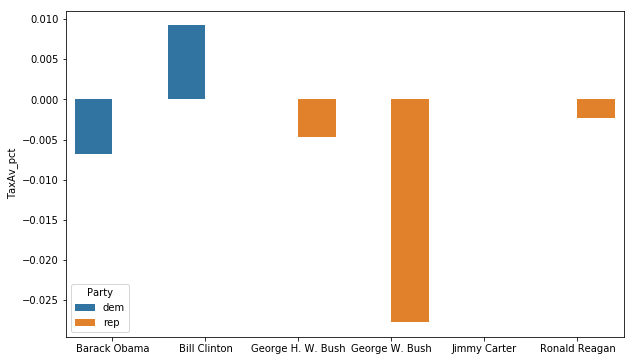

In [346]:
plt.figure(figsize=(10,6))
sns.barplot(x=data_president.index.values,y=data_president['TaxAv_pct'], hue=data_president['Party'])

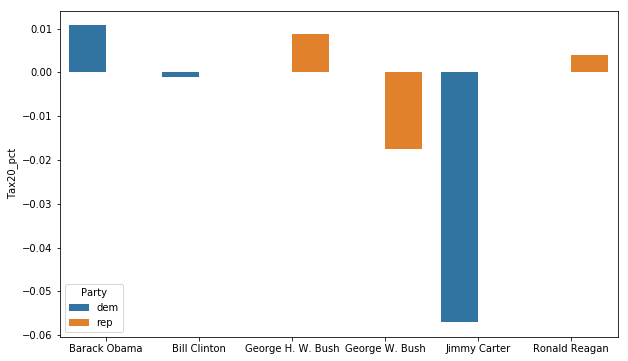

In [347]:
plt.figure(figsize=(10,6))
sns.barplot(x=data_president.index.values,y=data_president['Tax20_pct'], hue=data_president['Party'])

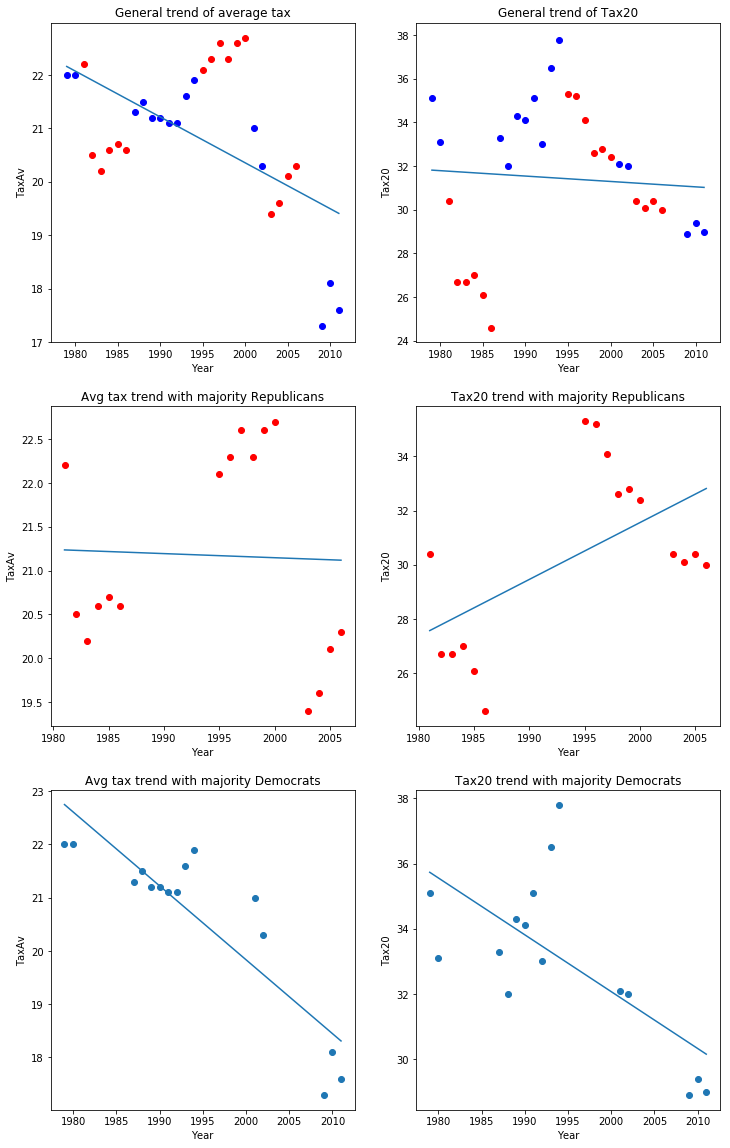

In [355]:
f, ax = plt.subplots(3,2)
f.set_figheight(20)
f.set_figwidth(12)
ax[0,0].set_title("General trend of average tax")
ax[0,0].scatter(x = repos['Year'], y=repos["TaxAv"],c='red')
ax[0,0].scatter(x = demos['Year'], y=demos["TaxAv"],c='blue')
ax[0,0].plot(np.unique(data_comp['Year']), np.poly1d(np.polyfit(data_comp['Year'], data_comp["TaxAv"], 1))(np.unique(data_comp['Year'])))
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('TaxAv')
ax[0,1].set_title("General trend of Tax20")
ax[0,1].scatter(x = repos['Year'], y=repos["Tax20"],c='red')
ax[0,1].scatter(x = demos['Year'], y=demos["Tax20"],c='blue')
ax[0,1].plot(np.unique(data_comp['Year']), np.poly1d(np.polyfit(data_comp['Year'], data_comp["Tax20"], 1))(np.unique(data_comp['Year'])))
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('Tax20')
ax[1,0].set_title("Avg tax trend with majority Republicans")
ax[1,0].scatter(x = repos['Year'], y=repos["TaxAv"],c='red')
ax[1,0].plot(np.unique(repos['Year']), np.poly1d(np.polyfit(repos['Year'], repos["TaxAv"], 1))(np.unique(repos['Year'])))
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('TaxAv')
ax[1,1].set_title("Tax20 trend with majority Republicans")
ax[1,1].scatter(x = repos['Year'], y=repos["Tax20"],c='red')
ax[1,1].plot(np.unique(repos['Year']), np.poly1d(np.polyfit(repos['Year'], repos["Tax20"], 1))(np.unique(repos['Year'])))
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Tax20')
ax[2,0].set_title("Avg tax trend with majority Democrats")
ax[2,0].scatter(x = demos['Year'], y=demos["TaxAv"])
ax[2,0].plot(np.unique(demos['Year']), np.poly1d(np.polyfit(demos['Year'], demos["TaxAv"], 1))(np.unique(demos['Year'])))
ax[2,0].set_xlabel('Year')
ax[2,0].set_ylabel('TaxAv')
ax[2,1].set_title("Tax20 trend with majority Democrats")
ax[2,1].scatter(x = demos['Year'], y=demos["Tax20"])
ax[2,1].plot(np.unique(demos['Year']), np.poly1d(np.polyfit(demos['Year'], demos["Tax20"], 1))(np.unique(demos['Year'])))
ax[2,1].set_xlabel('Year')
ax[2,1].set_ylabel('Tax20')

plt.savefig('final.png',dpi=100)

In [138]:
plt.figure(figsize=(12,10))
import seaborn as sns
corr = data_comp.corr()
correlation_matrix = corr.style.background_gradient().set_precision(2)
correlation_matrix

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Year,Tax20,TaxAv,SenDem,SenRep,SenInd,HseDem,HseRep,HseInd,Tax20_pct,TaxAv_pct,SenDem_pct,SenRep_pct,tax_diff
Year,1,-0.073,-0.57,-0.15,0.057,0.6,-0.64,0.64,0.5,0.0017,-0.18,0.12,-0.14,0.22
Tax20,-0.073,1,0.58,0.46,-0.39,-0.53,-0.00072,-0.0077,-0.2,0.31,0.32,-0.069,0.049,0.9
TaxAv,-0.57,0.58,1,-0.11,0.22,-0.79,0.03,-0.04,-0.15,-0.0067,0.38,-0.21,0.19,0.16
SenDem,-0.15,0.46,-0.11,1,-0.99,0.34,0.65,-0.65,-0.38,0.37,0.11,0.36,-0.34,0.62
SenRep,0.057,-0.39,0.22,-0.99,1,-0.42,-0.61,0.61,0.36,-0.34,-0.043,-0.37,0.34,-0.59
SenInd,0.6,-0.53,-0.79,0.34,-0.42,1,0.14,-0.12,nan,0.37,-0.092,0.31,-0.26,0.077
HseDem,-0.64,-0.00072,0.03,0.65,-0.61,0.14,1,-1,-0.48,0.22,0.14,0.32,-0.3,-0.017
HseRep,0.64,-0.0077,-0.04,-0.65,0.61,-0.12,-1,1,0.46,-0.22,-0.14,-0.32,0.3,0.012
HseInd,0.5,-0.2,-0.15,-0.38,0.36,nan,-0.48,0.46,1,0.036,-0.15,0.17,-0.2,-0.16
Tax20_pct,0.0017,0.31,-0.0067,0.37,-0.34,0.37,0.22,-0.22,0.036,1,0.34,0.5,-0.45,0.38


<Figure size 864x720 with 0 Axes>

In [242]:
data_pair = data_comp.copy()
data_pairplot = data_pair[['Tax20','TaxAv','SenDem','SenRep','HseDem','HseRep','President','Tax20_pct','TaxAv_pct','SenDem_pct','SenRep_pct','tax_diff','maj_dem','maj_rep']]

In [245]:
data_pairplot.fillna(0,inplace=True)

/Users/bassim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


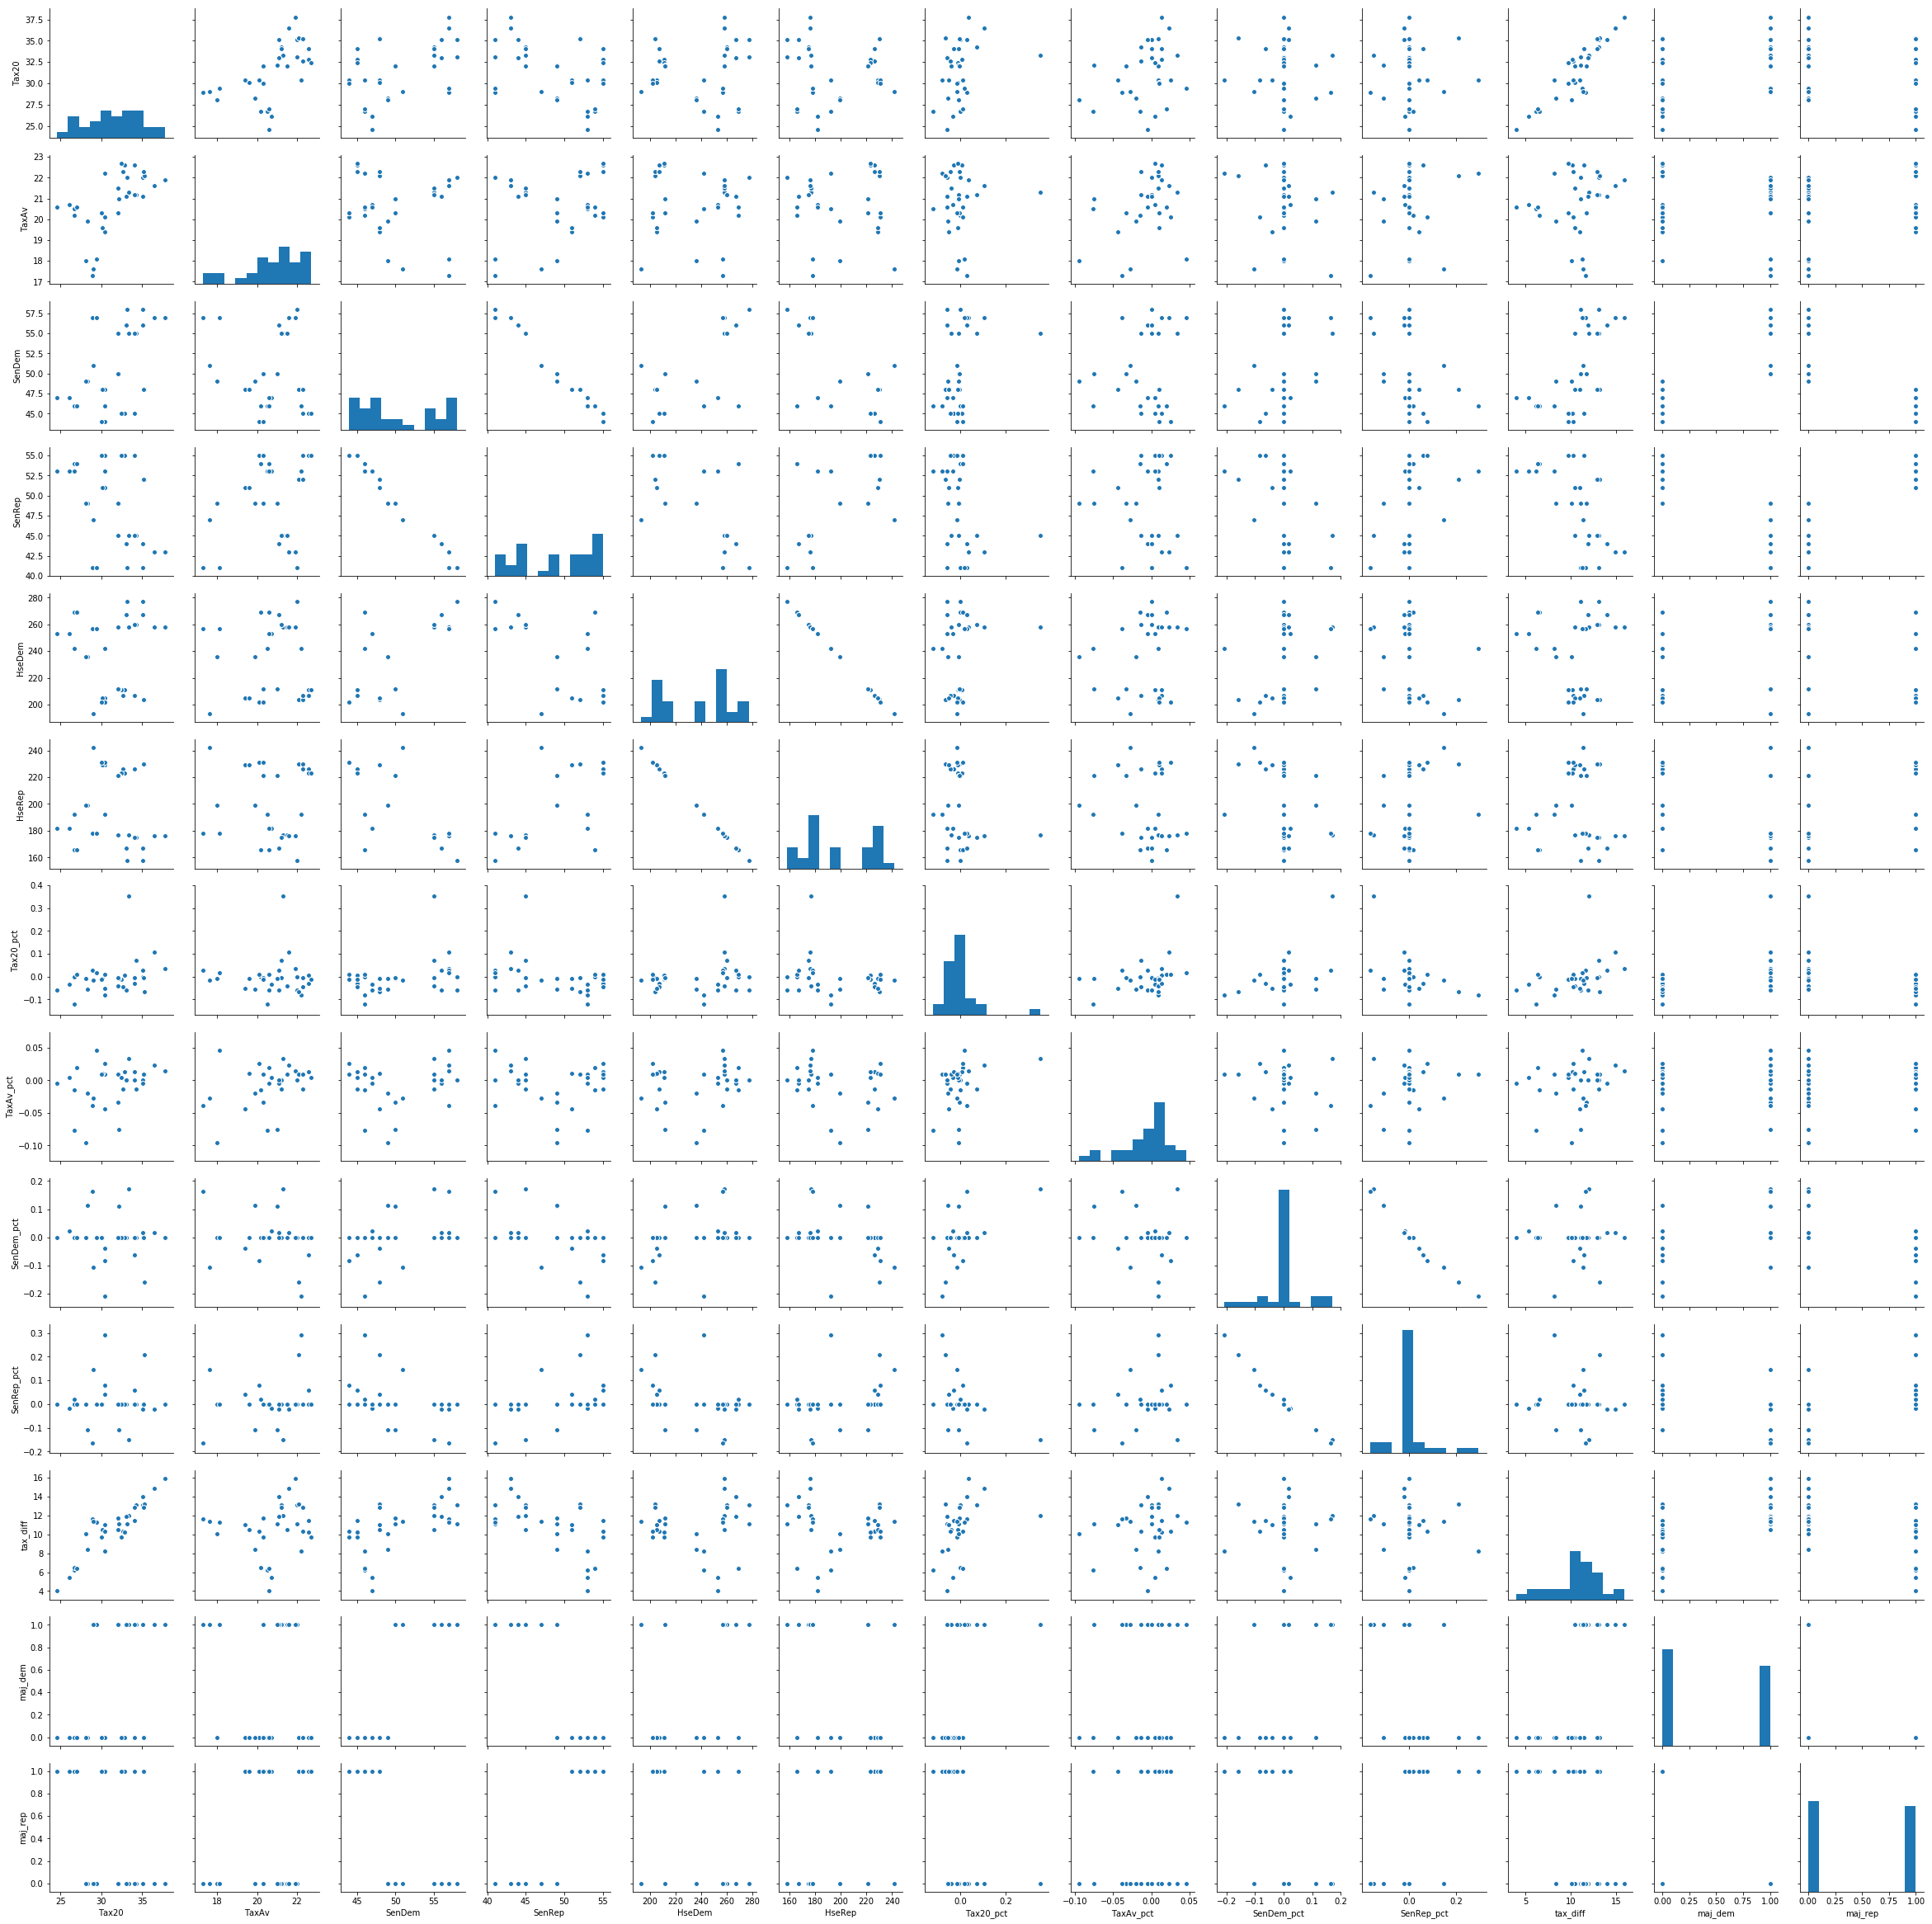

In [246]:
sns.pairplot(data_pairplot)

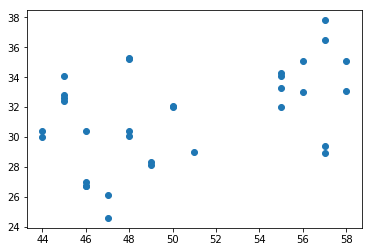

In [266]:
plt.scatter(x = data_comp['SenDem'], y = data_comp['Tax20'])

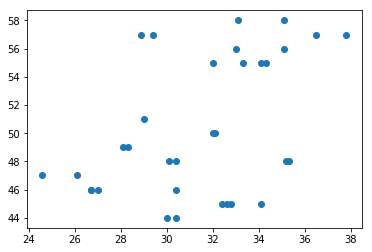

In [268]:
plt.scatter(y = data_comp['SenDem'], x = data_comp['Tax20'])

In [273]:
np.corrcoef(data_comp['Tax20'], data_comp['SenDem'])[0, 1]

0.46092989943511037

In [ ]:
_hse

Text(0,0.5,'Tax20')

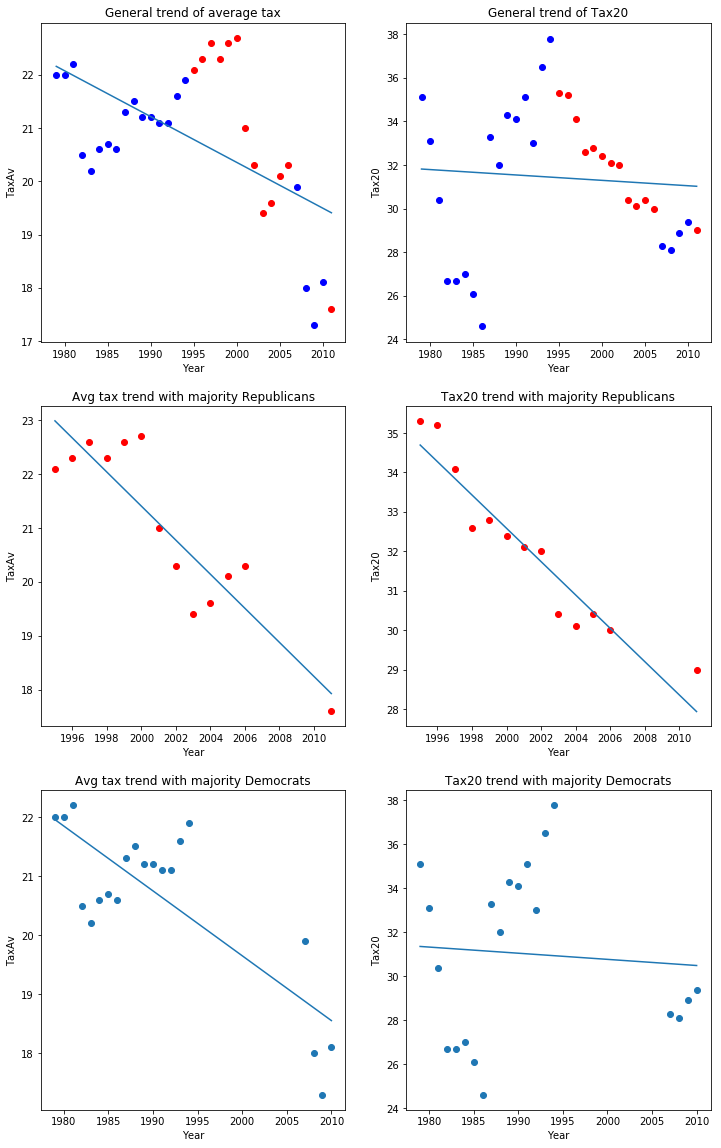

In [277]:
f, ax = plt.subplots(3,2)
f.set_figheight(20)
f.set_figwidth(12)
ax[0,0].set_title("General trend of average tax")
ax[0,0].scatter(x = repos_hse['Year'], y=repos_hse["TaxAv"],c='red')
ax[0,0].scatter(x = demos_hse['Year'], y=demos_hse["TaxAv"],c='blue')
ax[0,0].plot(np.unique(data_comp['Year']), np.poly1d(np.polyfit(data_comp['Year'], data_comp["TaxAv"], 1))(np.unique(data_comp['Year'])))
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('TaxAv')
ax[0,1].set_title("General trend of Tax20")
ax[0,1].scatter(x = repos_hse['Year'], y=repos_hse["Tax20"],c='red')
ax[0,1].scatter(x = demos_hse['Year'], y=demos_hse["Tax20"],c='blue')
ax[0,1].plot(np.unique(data_comp['Year']), np.poly1d(np.polyfit(data_comp['Year'], data_comp["Tax20"], 1))(np.unique(data_comp['Year'])))
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('Tax20')
ax[1,0].set_title("Avg tax trend with majority Republicans")
ax[1,0].scatter(x = repos_hse['Year'], y=repos_hse["TaxAv"],c='red')
ax[1,0].plot(np.unique(repos_hse['Year']), np.poly1d(np.polyfit(repos_hse['Year'], repos_hse["TaxAv"], 1))(np.unique(repos_hse['Year'])))
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('TaxAv')
ax[1,1].set_title("Tax20 trend with majority Republicans")
ax[1,1].scatter(x = repos_hse['Year'], y=repos_hse["Tax20"],c='red')
ax[1,1].plot(np.unique(repos_hse['Year']), np.poly1d(np.polyfit(repos_hse['Year'], repos_hse["Tax20"], 1))(np.unique(repos_hse['Year'])))
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Tax20')
ax[2,0].set_title("Avg tax trend with majority Democrats")
ax[2,0].scatter(x = demos_hse['Year'], y=demos_hse["TaxAv"])
ax[2,0].plot(np.unique(demos_hse['Year']), np.poly1d(np.polyfit(demos_hse['Year'], demos_hse["TaxAv"], 1))(np.unique(demos_hse['Year'])))
ax[2,0].set_xlabel('Year')
ax[2,0].set_ylabel('TaxAv')
ax[2,1].set_title("Tax20 trend with majority Democrats")
ax[2,1].scatter(x = demos_hse['Year'], y=demos_hse["Tax20"])
ax[2,1].plot(np.unique(demos_hse['Year']), np.poly1d(np.polyfit(demos_hse['Year'], demos_hse["Tax20"], 1))(np.unique(demos_hse['Year'])))
ax[2,1].set_xlabel('Year')
ax[2,1].set_ylabel('Tax20')

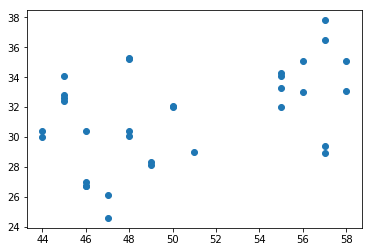

In [281]:
plt.scatter(x=data_comp['SenDem'],y=data_comp['Tax20'])

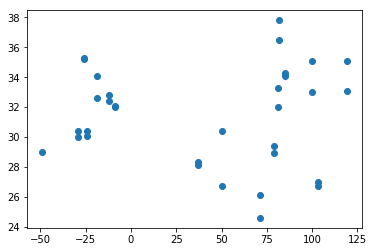

In [282]:
plt.scatter(x=data_comp['HseDem'] - data_comp['HseRep'],y=data_comp['Tax20'])

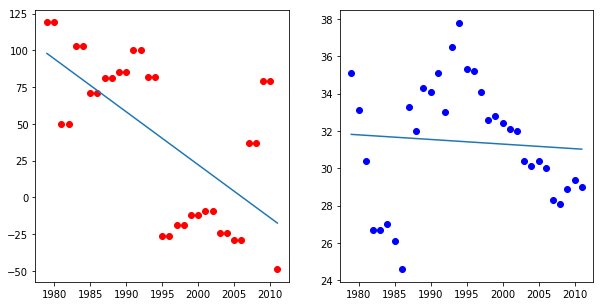

In [293]:
f, ax = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(10)
ax[0].scatter(y=data_comp['HseDem'] - data_comp['HseRep'],x=data_comp['Year'], c='red')
ax[0].plot(np.unique(data_comp['Year']), np.poly1d(np.polyfit(data_comp['Year'], data_comp['HseDem'] - data_comp['HseRep'], 1))(np.unique(data_comp['Year'])))
ax[1].scatter(y=data_comp['Tax20'],x=data_comp['Year'], c='blue')
ax[1].plot(np.unique(data_comp['Year']), np.poly1d(np.polyfit(data_comp['Year'], data_comp['Tax20'], 1))(np.unique(data_comp['Year'])))